In [2]:
Progress <- R6::R6Class("Progress",
  inherit = KerasCallback,
  
  public = list(
    num_epochs  = NULL,
    update_frequency = NULL,
    epoch = NULL,
    batch = NULL,
      
    initialize = function(num_epochs, update_frequency) {
        self$num_epochs <- num_epochs
        self$update_frequency <- update_frequency
        self$epoch <- 1
    },
                        
    on_batch_end = function(batch, logs = list()) {
        if ((batch + 1) %% self$update_frequency == 0) {
            cat('Epoch ', self$epoch + 1, '/', self$num_epochs, ': ', batch + 1,
                ' - loss: ', logs[['loss']], '\r', sep = '')
            flush.console()
        }
        self$batch <- batch
    },
      
    on_epoch_begin = function(epoch, logs = list()) {
        self$epoch <- epoch
    },
                        
    on_epoch_end = function(epoch, logs = list()) {
        cat('Epoch ', self$epoch + 1, '/', self$num_epochs, ': ', self$batch + 1, ' - loss: ', logs[['loss']], ' - validation loss: ', logs[['val_loss']], '\n', sep = '')
        flush.console()
    }
))

In [1]:
library(keras)
library(ggplot2)
library(tidyverse)
library(rsample)
library(reshape2)

library(repr)
options(repr.plot.width=6, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.0.1     ✔ purrr   0.2.5
✔ tidyr   0.8.2     ✔ dplyr   0.7.8
✔ readr   1.3.1     ✔ stringr 1.3.1
✔ tibble  2.0.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [3]:
imdb <- dataset_imdb(num_words = 10000)
c(c(X_train, y_train), c(X_test, y_test)) %<-% imdb
length(X_train)

[1] 25000

In [4]:
X_train[[1]]

[1]    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941    4
 [16]  173   36  256    5   25  100   43  838  112   50  670    2    9   35  480
 [31]  284    5  150    4  172  112  167    2  336  385   39    4  172 4536 1111
 [46]   17  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
 [61]    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76   15
 [76]   13 1247    4   22   17  515   17   12   16  626   18    2    5   62  386
 [91]   12    8  316    8  106    5    4 2223 5244   16  480   66 3785   33    4
[106]  130   12   16   38  619    5   25  124   51   36  135   48   25 1415   33
[121]    6   22   12  215   28   77   52    5   14  407   16   82    2    8    4
[136]  107  117 5952   15  256    4    2    7 3766    5  723   36   71   43  530
[151]  476   26  400  317   46    7    4    2 1029   13  104   88    4  381   15
[166]  297   98   32 2071   56   26  141    6  194 7486   18    4  226   22   21
[181]  134  476   26  480    5  144   30 5535   18   51   36   28  224   92   25
[196]  104    4  226   65   16   38 1334   88   12   16  283    5   16 4472  113
[211]  103   32   15   16 5345   19  178   32

In [5]:
word_index <- dataset_imdb_word_index()
reverse_word_index <- names(word_index)
names(reverse_word_index) <- word_index
decoded <- sapply(X_train[[1]], function(index) {
    word <- if (index >= 3) reverse_word_index[[as.character(index - 3)]]
    if (!is.null(word))
        word
    else
        "?"
})

In [6]:
decoded

[1] "?"          "this"       "film"       "was"        "just"      
  [6] "brilliant"  "casting"    "location"   "scenery"    "story"     
 [11] "direction"  "everyone's" "really"     "suited"     "the"       
 [16] "part"       "they"       "played"     "and"        "you"       
 [21] "could"      "just"       "imagine"    "being"      "there"     
 [26] "robert"     "?"          "is"         "an"         "amazing"   
 [31] "actor"      "and"        "now"        "the"        "same"      
 [36] "being"      "director"   "?"          "father"     "came"      
 [41] "from"       "the"        "same"       "scottish"   "island"    
 [46] "as"         "myself"     "so"         "i"          "loved"     
 [51] "the"        "fact"       "there"      "was"        "a"         
 [56] "real"       "connection" "with"       "this"       "film"      
 [61] "the"        "witty"      "remarks"    "throughout" "the"       
 [66] "film"       "were"       "great"      "it"         "was"       
 [71] "just"       "brilliant"  "so"         "much"       "that"      
 [76] "i"          "bought"     "the"        "film"       "as"        
 [81] "soon"       "as"         "it"         "was"        "released"  
 [86] "for"        "?"          "and"        "would"      "recommend" 
 [91] "it"         "to"         "everyone"   "to"         "watch"     
 [96] "and"        "the"        "fly"        "fishing"    "was"       
[101] "amazing"    "really"     "cried"      "at"         "the"       
[106] "end"        "it"         "was"        "so"         "sad"       
[111] "and"        "you"        "know"       "what"       "they"      
[116] "say"        "if"         "you"        "cry"        "at"        
[121] "a"          "film"       "it"         "must"       "have"      
[126] "been"       "good"       "and"        "this"       "definitely"
[131] "was"        "also"       "?"          "to"         "the"       
[136] "two"        "little"     "boy's"      "that"       "played"    
[141] "the"        "?"          "of"         "norman"     "and"       
[146] "paul"       "they"       "were"       "just"       "brilliant" 
[151] "children"   "are"        "often"      "left"       "out"       
[156] "of"         "the"        "?"          "list"       "i"         
[161] "think"      "because"    "the"        "stars"      "that"      
[166] "play"       "them"       "all"        "grown"      "up"        
[171] "are"        "such"       "a"          "big"        "profile"   
[176] "for"        "the"        "whole"      "film"       "but"       
[181] "these"      "children"   "are"        "amazing"    "and"       
[186] "should"     "be"         "praised"    "for"        "what"      
[191] "they"       "have"       "done"       "don't"      "you"       
[196] "think"      "the"        "whole"      "story"      "was"       
[201] "so"         "lovely"     "because"    "it"         "was"       
[206] "true"       "and"        "was"        "someone's"  "life"      
[211] "after"      "all"        "that"       "was"        "shared"    
[216] "with"       "us"         "all"

In [7]:
vectorize_sequences <- function(sequences, dimension = 10000) {
    results <- matrix(0, nrow = length(sequences), ncol = dimension)
    for (i in 1:length(sequences))
        results[i, sequences[[i]]] <- 1
    results
}

In [8]:
X_train_vect <- vectorize_sequences(X_train)
X_test_vect <- vectorize_sequences(X_test)

In [9]:
dim(X_train_vect)

[1] 25000 10000

In [10]:
glimpse(X_train_vect[1,])

 num [1:10000] 1 1 0 1 1 1 1 1 1 0 ...


In [11]:
y_train <- as.numeric(y_train)
y_test <- as.numeric(y_test)

In [12]:
glimpse(y_train)

 num [1:25000] 1 0 0 1 0 0 1 0 1 0 ...


## Training and validation set

In [13]:
split <- 1:20000
X_val <- X_train_vect[-split,]
X_train_vect <- X_train_vect[split,]
y_val <- y_train[-split]
y_train <- y_train[split]

cat(dim(X_train_vect))
dim(X_val)

20000 10000

[1]  5000 10000

In [ ]:
num_epochs <- 9

model <- keras_model_sequential() %>%
    layer_dense(units = 16, input_shape = c(10000), activation = "sigmoid") %>%
    layer_dense(units = 16, activation = "sigmoid") %>%
    layer_dense(units = 1, activation = "sigmoid")

model %>% compile(
    optimizer = optimizer_rmsprop(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    X_train_vect, y_train,
    epochs = num_epochs,
    batch_size = 512,
    validation_data = list(X_val, y_val),
    callbacks = list(Progress$new(num_epochs, 10))
)

plot(history)

In [19]:
y_pred <- model %>% predict(X_test_vect)
dim(y_pred)

[1] 25000     1

In [20]:
model %>% evaluate(X_test_vect, y_test)

$loss
[1] 0.2822068

$acc
[1] 0.8868

In [24]:
sorted <- sort(abs(y_test - y_pred), index.return = TRUE, decreasing = TRUE)
sorted$ix[[1]]

[1] 10372

In [25]:
decoded <- sapply(X_test[[10372]], function(index) {
    word <- if (index >= 3) reverse_word_index[[as.character(index - 3)]]
    if (!is.null(word))
        word
    else
        "?"
})
decoded

[1] "?"              "some"           "spoilers"       "included"      
   [5] "br"             "br"             "although"       "many"          
   [9] "?"              "have"           "called"         "this"          
  [13] "film"           "surreal"        "the"            "term"          
  [17] "fits"           "poorly"         "here"           "to"            
  [21] "quote"          "from"           "?"              "surreal"       
  [25] "means"          "br"             "br"             "fantastic"     
  [29] "or"             "?"              "imagery"        "one"           
  [33] "?"              "explain"        "to"             "the"           
  [37] "unimaginative"  "how"            "many"           "ways"          
  [41] "a"              "?"              "ten"            "year"          
  [45] "old"            "boy"            "at"             "large"         
  [49] "and"            "seeking"        "his"            "fortune"       
  [53] "in"             "the"            "?"              "seat"          
  [57] "of"             "a"              "red"            "?"             
  [61] "could"          "be"             "fantastic"      "those"         
  [65] "curious"        "might"          "read"           "james"         
  [69] "?"              "but"            "if"             "you"           
  [73] "asked"          "said"           "?"              "how"           
  [77] "he"             "were"           "?"              "behind"        
  [81] "the"            "wheel"          "of"             "a"             
  [85] "sports"         "car"            "he'd"           "surely"        
  [89] "protest"        "no"             "way"            "what"          
  [93] "fantasies"      "and"            "?"              "the"           
  [97] "film"           "offers"         "mostly"         "appear"        
 [101] "within"         "the"            "first"          "fifteen"       
 [105] "minutes"        "thereafter"     "we"             "get"           
 [109] "more"           "?"              "of"             "the"           
 [113] "same"           "in"             "an"             "ever"          
 [117] "?"              "and"            "more"           "?"             
 [121] "progression"    "that"           "far"            "from"          
 [125] "?"              "soon"           "proves"         "predictable"   
 [129] "not"            "that"           "it"             "were"          
 [133] "on"             "the"            "other"          "hand"          
 [137] "literally"      "believable"     "but"            "it"            
 [141] "were"           "unfair"         "to"             "tax"           
 [145] "in"             "particular"     "with"           "this"          
 [149] "flaw"           "any"            "plausible"      "suspension"    
 [153] "of"             "disbelief"      "having"         "fallen"        
 [157] "?"              "on"             "the"            "typical"       
 [161] "film"           "?"              "and"            "viewer's"      
 [165] "scale"          "of"             "values"         "ever"          
 [169] "since"          "?"              "of"             "the"           
 [173] "lost"           "?"              "became"         "a"             
 [177] "blockbuster"    "br"             "br"             "?"             
 [181] "how"            "do"             "we"             "know"          
 [185] "what"           "a"              "?"              "is"            
 [189] "if"             "part"           "of"             "having"        
 [193] "one"            "is"             "not"            "knowing"       
 [197] "that"           "we"             "are"            "having"        
 [201] "one"            "at"             "any"            "rate"          
 [205] "some"           "people"         "know"           "that"          
 [209] "they"           "enjoy"          "?"              "drugs"         
 [213] "but"            "if"

In [ ]:
X_test[1,]

## Regularization & drop-out

In [33]:
num_epochs <- 25

model <- keras_model_sequential() %>%
    layer_dense(units = 64, input_shape = c(10000), activation = "relu",
                kernel_regularizer = regularizer_l2(0.01)) %>%
#     layer_dense(units = 512, input_shape = c(10000), activation = "relu") %>%
    layer_dropout(rate = 0.5) %>%
#     layer_dense(units = 512, input_shape = c(10000), activation = "relu") %>%
    layer_dense(units = 64, activation = "relu",
               kernel_regularizer = regularizer_l2(0.01)) %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 1, activation = "sigmoid")

cat(summary(model))

model %>% compile(
    optimizer = optimizer_rmsprop(lr = 0.001),
    loss = "binary_crossentropy",
    metrics = c("accuracy")
)

history_drop_reg <- model %>% fit(
    X_train_vect, y_train,
    epochs = num_epochs,
    batch_size = 512,
    validation_data = list(X_val, y_val),
    callbacks = list(Progress$new(num_epochs, 10)),
    shuffle = TRUE
)

# plot(history_drop)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_31 (Dense)                    (None, 64)                      640064      
________________________________________________________________________________
dropout_5 (Dropout)                 (None, 64)                      0           
________________________________________________________________________________
dense_32 (Dense)                    (None, 64)                      4160        
________________________________________________________________________________
dropout_6 (Dropout)                 (None, 64)                      0           
________________________________________________________________________________
dense_33 (Dense)                    (None, 1)                       65          
Total params: 644,289
Trainable params: 644,289
Non-trainable params: 0
_____________________________________

$loss
[1] 1.084264

$acc
[1] 0.87876

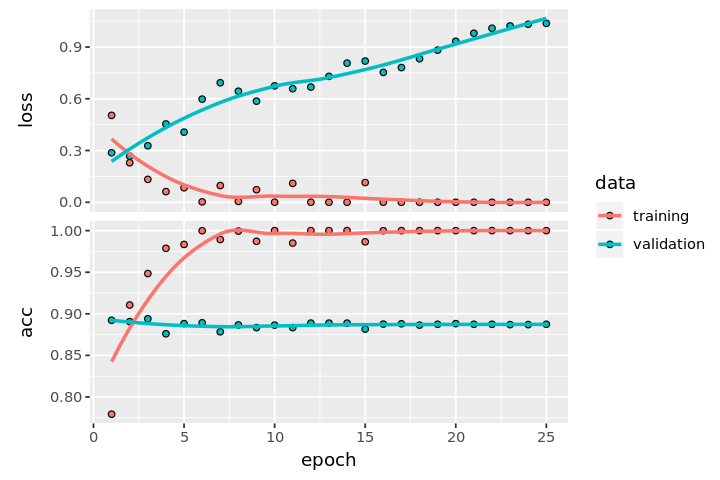

In [18]:
# Normal
plot(history_normal)
model %>% evaluate(X_test_vect, y_test)

$loss
[1] 0.391752

$acc
[1] 0.88152

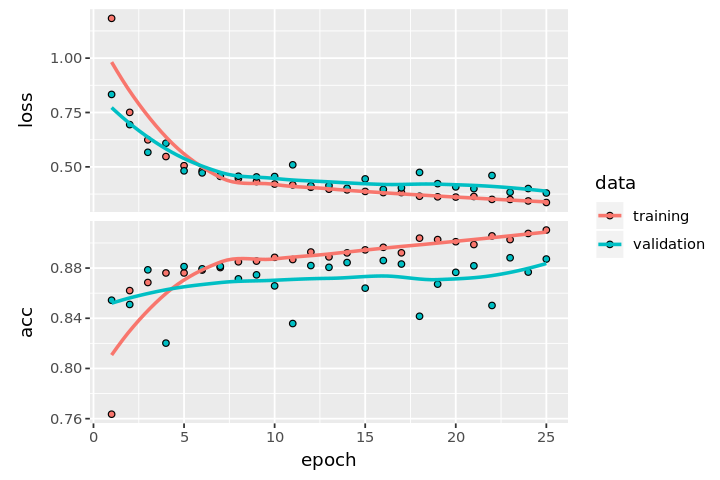

In [31]:
# Regularized
plot(history_reg)
model %>% evaluate(X_test_vect, y_test)

$loss
[1] 1.026702

$acc
[1] 0.86732

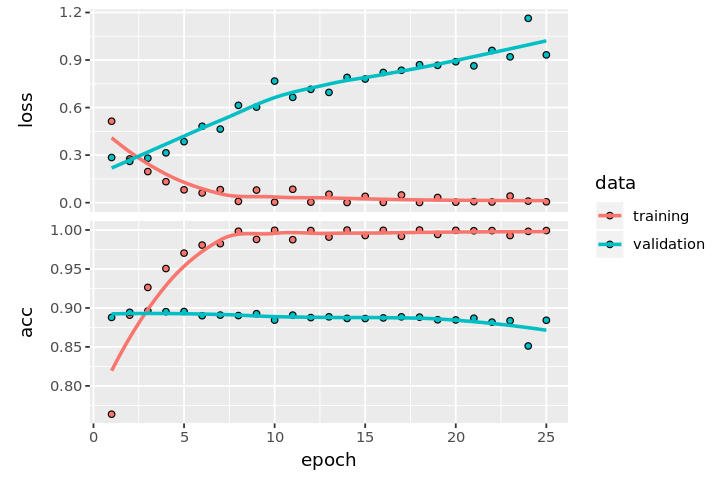

In [20]:
# Drop-out
plot(history_drop)
model %>% evaluate(X_test_vect, y_test)

$loss
[1] 0.4208981

$acc
[1] 0.87624

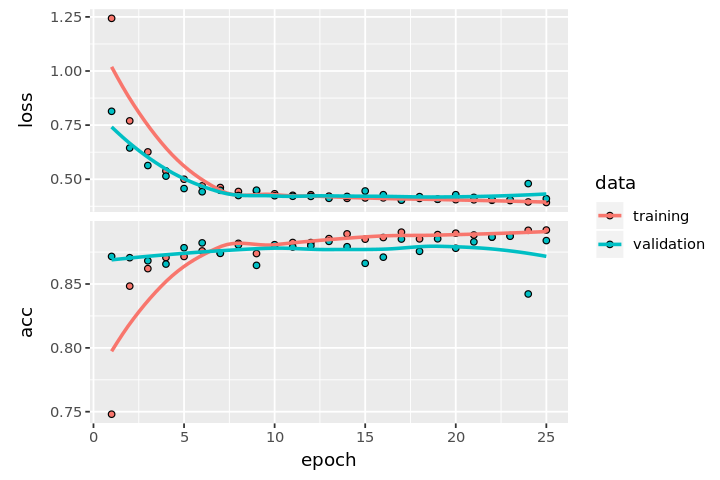

In [34]:
# Drop-out + reg.
plot(history_drop_reg)
model %>% evaluate(X_test_vect, y_test)

## Reuters data set

## TODO: factors should be identical between training and test set

In [283]:
reuters_train <- read.csv('Reuters-R10-training.csv', header = FALSE, stringsAsFactors = FALSE)
reuters_test <- read.csv('Reuters-R10-test.csv', header = FALSE, stringsAsFactors = FALSE)
cat(dim(reuters_train), dim(reuters_test), sep = ' ')

7192 2 2787 2

In [284]:
X_train_text <- reuters_train$V2
y_train_text <- reuters_train$V1
X_test_text <- reuters_test$V2
y_test_text <- reuters_test$V1

In [285]:
7192 / 2797

[1] 2.571326

In [286]:
length(y_test_text)

[1] 2787

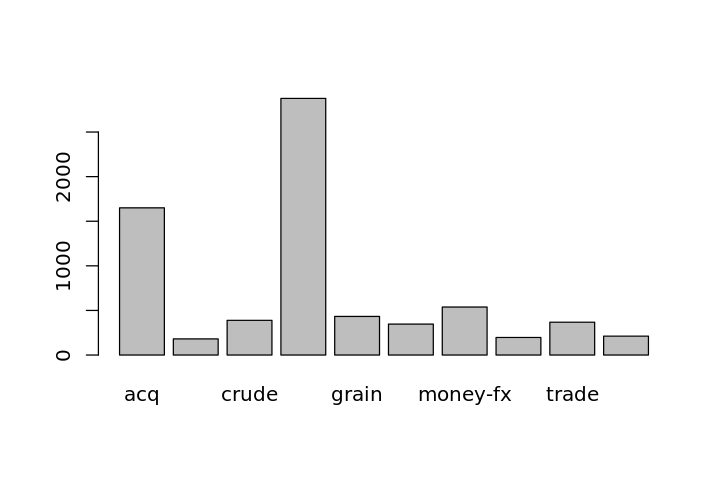

In [287]:
barplot(table(y_train_text))

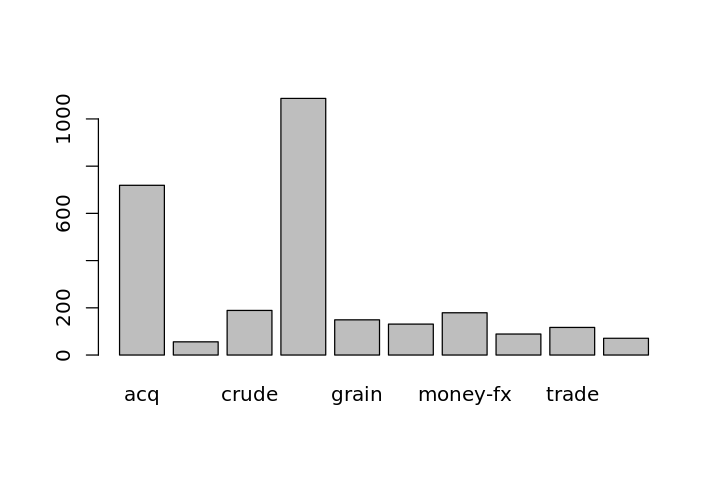

In [288]:
barplot(table(y_test_text))

In [289]:
tokenizer <- text_tokenizer(num_words = 10000) %>% fit_text_tokenizer(X_train_text)
X_train <- tokenizer %>% texts_to_matrix(X_train_text, mode = "binary")
X_test <- tokenizer %>% texts_to_matrix(X_test_text, mode = "binary")

cat(dim(X_train), dim(X_test), sep = " ")

7192 10000 2787 10000

In [290]:
y_train <- as.numeric(as.factor(y_train_text)) - 1
y_test <- as.numeric(as.factor(y_test_text)) - 1

In [291]:
train_indices <- sample(1:length(y_train))
test_indices <- sample(1:length(y_test))

In [292]:
X_train <- X_train[train_indices,]
y_train <- to_categorical(y_train[train_indices])
X_test <- X_test[test_indices,]
y_test <- to_categorical(y_test[test_indices])

dim(y_train)

[1] 7192   10

In [293]:
val_indices <- floor(0.8 * dim(y_train)[1]):dim(y_train)[1]
X_val <- X_train[val_indices,]
y_val <- y_train[val_indices,]

X_train <- X_train[-val_indices,]
y_train <- y_train[-val_indices,]

Epoch 1/100: 12 - loss: 2.250185 - validation loss: 1.819688
Epoch 2/100: 12 - loss: 1.893655 - validation loss: 1.697436
Epoch 3/100: 12 - loss: 1.763269 - validation loss: 1.599076
Epoch 4/100: 12 - loss: 1.656834 - validation loss: 1.501284
Epoch 5/100: 12 - loss: 1.546841 - validation loss: 1.404091
Epoch 6/100: 12 - loss: 1.456789 - validation loss: 1.314607
Epoch 7/100: 12 - loss: 1.355675 - validation loss: 1.230984
Epoch 8/100: 12 - loss: 1.268972 - validation loss: 1.149952
Epoch 9/100: 12 - loss: 1.186472 - validation loss: 1.078943
Epoch 10/100: 12 - loss: 1.118053 - validation loss: 1.022541
Epoch 11/100: 12 - loss: 1.056882 - validation loss: 0.9712962
Epoch 12/100: 12 - loss: 0.9880093 - validation loss: 0.9276739
Epoch 13/100: 12 - loss: 0.9502039 - validation loss: 0.891089
Epoch 14/100: 12 - loss: 0.9146852 - validation loss: 0.8586093
Epoch 15/100: 12 - loss: 0.8796522 - validation loss: 0.8296418
Epoch 16/100: 12 - loss: 0.8362436 - validation loss: 0.8003624
Epoch 1

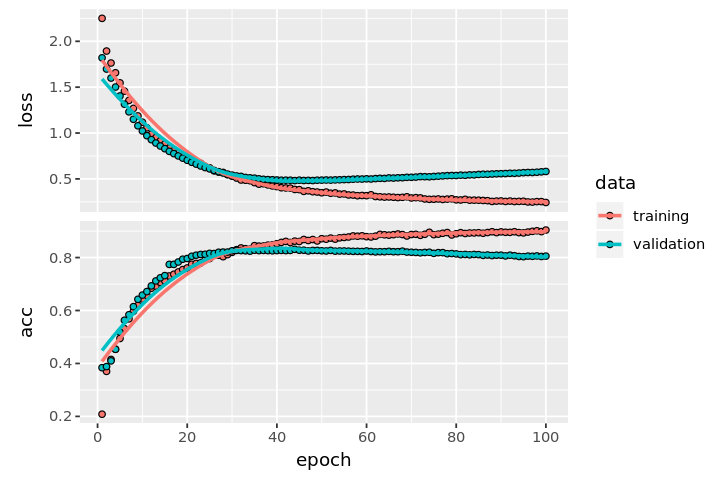

In [294]:
num_epochs <- 100

model <- keras_model_sequential() %>%
    layer_dense(units = 64, input_shape = c(10000), activation = "sigmoid") %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 64, activation = "sigmoid") %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 10, activation = "softmax")

model %>% compile(
    optimizer = optimizer_rmsprop(lr = 0.001),
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    X_train, y_train,
    epochs = num_epochs,
    batch_size = 512,
    validation_data = list(X_val, y_val),
    callbacks = list(Progress$new(num_epochs, 10))
)

plot(history)

In [295]:
confusionMatrix <- function(y_true, y_pred) {
    y_t <- apply(y_true, 1, which.max)
    y_p <- apply(y_pred, 1, which.max)
    labels <- unique(y_t)
    
    df <- expand.grid(true = labels, pred = labels)
    cbind(df, count = apply(df, 1, function(row) {
        c(true, pred) %<-% row
        count <- sum(y_t == true & y_p == pred)
        count
    }))
}

In [296]:
cm <- confusionMatrix(y_val, model %>% predict(X_val))
glimpse(cm)

Observations: 100
Variables: 3
$ true  <int> 4, 10, 1, 9, 7, 6, 5, 8, 3, 2, 4, 10, 1, 9, 7, 6, 5, 8, 3, 2, 4…
$ pred  <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 1…
$ count <int> 537, 0, 8, 2, 3, 1, 1, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…


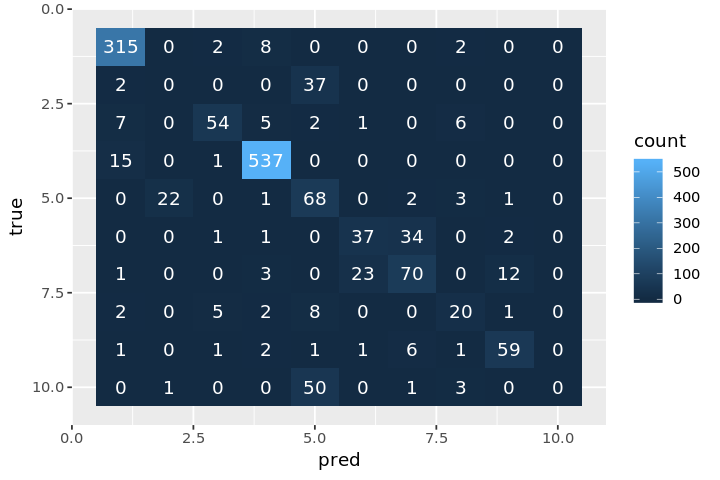

In [297]:
ggplot(data = cm, aes(x = pred, y = true, fill = count)) +
    geom_tile() +
    scale_y_reverse() +
    geom_text(aes(label = count), color = "white")

## Training with class weights

In [299]:
frequencies <- table(apply(y_train, 1, which.max))
class_weights <- vector(mode = "list", length = length(frequencies))
names(class_weights) <- as.character(seq(0, length(frequencies) - 1))
total <- sum(1 / frequencies)
for (i in 1:length(names(class_weights))) {
    key <- names(class_weights)[[i]]
    
    # Class weights are passed directly to Python, and are 0-indexed
    original_key <- as.character(as.numeric(key) + 1)
    class_weights[[key]] <- 1 / frequencies[[original_key]] / total
}
cat(frequencies)
class_weights

1323 142 314 2324 336 272 429 159 296 157

$`0`
[1] 0.02074601

$`1`
[1] 0.1932885

$`2`
[1] 0.08741073

$`3`
[1] 0.01181023

$`4`
[1] 0.08168741

$`5`
[1] 0.100908

$`6`
[1] 0.06397895

$`7`
[1] 0.1726225

$`8`
[1] 0.09272625

$`9`
[1] 0.1748215

Epoch 1/100: 12 - loss: 0.122506 - validation loss: 2.137881
Epoch 2/100: 12 - loss: 0.1133478 - validation loss: 2.141239
Epoch 3/100: 12 - loss: 0.1106073 - validation loss: 2.07804
Epoch 4/100: 12 - loss: 0.1075212 - validation loss: 2.005946
Epoch 5/100: 12 - loss: 0.1052473 - validation loss: 1.931217
Epoch 6/100: 12 - loss: 0.1019641 - validation loss: 1.858412
Epoch 7/100: 12 - loss: 0.09728274 - validation loss: 1.722354
Epoch 8/100: 12 - loss: 0.09513524 - validation loss: 1.643724
Epoch 9/100: 12 - loss: 0.09064342 - validation loss: 1.519012
Epoch 10/100: 12 - loss: 0.08733323 - validation loss: 1.412611
Epoch 11/100: 12 - loss: 0.08254464 - validation loss: 1.298457
Epoch 12/100: 12 - loss: 0.07916526 - validation loss: 1.218878
Epoch 13/100: 12 - loss: 0.07555619 - validation loss: 1.125832
Epoch 14/100: 12 - loss: 0.07282567 - validation loss: 1.038194
Epoch 15/100: 12 - loss: 0.06872401 - validation loss: 0.9658223
Epoch 16/100: 12 - loss: 0.06543682 - validation loss: 0

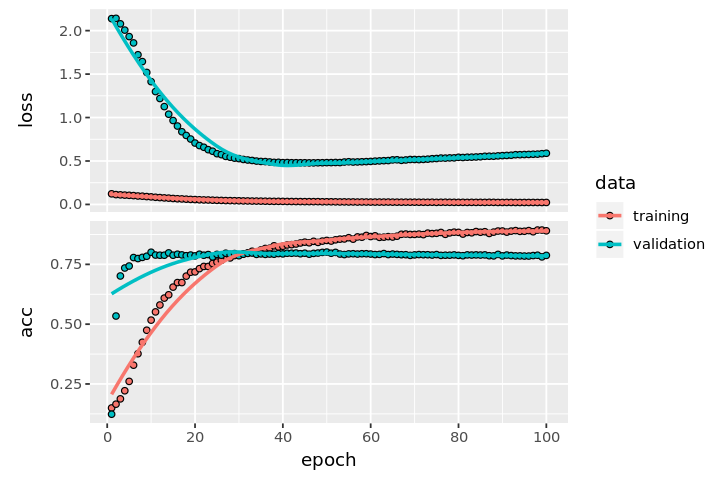

In [300]:
num_epochs <- 100

model <- keras_model_sequential() %>%
    layer_dense(units = 64, input_shape = c(10000), activation = "sigmoid") %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 64, activation = "sigmoid") %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 10, activation = "softmax")

model %>% compile(
    optimizer = optimizer_rmsprop(lr = 0.001),
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    X_train, y_train,
    epochs = num_epochs,
    batch_size = 512,
    validation_data = list(X_val, y_val),
    callbacks = list(Progress$new(num_epochs, 10)),
    class_weight = class_weights
)

plot(history)

In [301]:
cm <- confusionMatrix(y_val, model %>% predict(X_val))
glimpse(cm)

Observations: 100
Variables: 3
$ true  <int> 4, 10, 1, 9, 7, 6, 5, 8, 3, 2, 4, 10, 1, 9, 7, 6, 5, 8, 3, 2, 4…
$ pred  <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 10, 10, 10, 10, 10, 10, 10, 10, 1…
$ count <int> 532, 0, 5, 0, 1, 0, 0, 1, 4, 0, 0, 15, 0, 0, 0, 0, 40, 1, 0, 12…


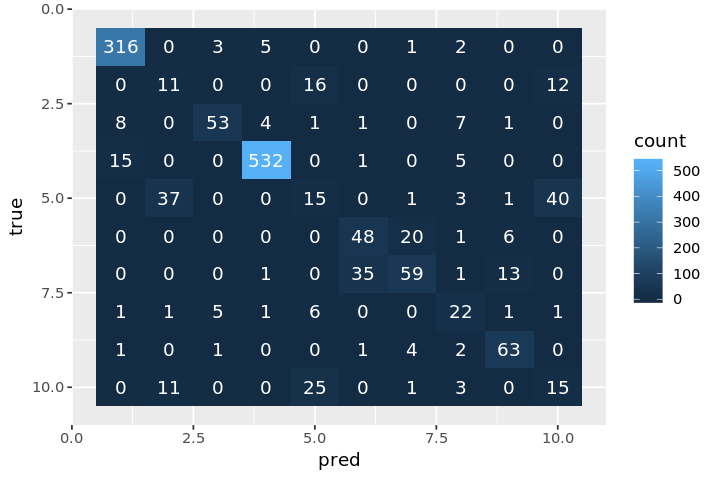

In [302]:
ggplot(data = cm, aes(x = pred, y = true, fill = count)) +
    geom_tile() +
    scale_y_reverse() +
    geom_text(aes(label = count), color = "white")

## Reuters with embedding

In [272]:
reuters_train <- read.csv('Reuters-R10-training.csv', header = FALSE, stringsAsFactors = FALSE)
reuters_test <- read.csv('Reuters-R10-test.csv', header = FALSE, stringsAsFactors = FALSE)
cat(dim(reuters_train), dim(reuters_test), sep = ' ')

7192 2 2787 2

In [273]:
X_train_text <- reuters_train$V2
y_train_text <- reuters_train$V1
X_test_text <- reuters_test$V2
y_test_text <- reuters_test$V1

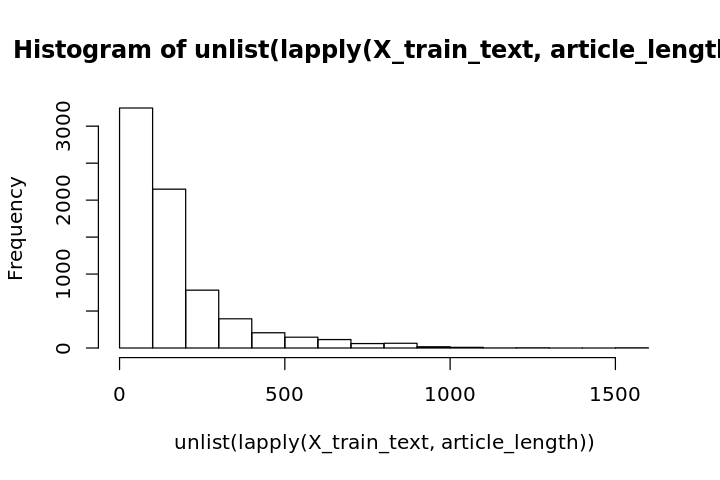

In [274]:
article_length <- function(text) {
    length(unlist(strsplit(text, " ")))
}

hist(unlist(lapply(X_train_text, article_length)))

In [275]:
tokenizer <- text_tokenizer(num_words = 10000) %>% fit_text_tokenizer(X_train_text)
X_train <- tokenizer %>% texts_to_sequences(X_train_text)
X_test <- tokenizer %>% texts_to_sequences(X_test_text)

cat(dim(X_train), dim(X_test), sep = " ")

In [276]:
maxlen <- 500
X_train <- pad_sequences(X_train, maxlen = maxlen)
X_test <- pad_sequences(X_test, maxlen = maxlen)

X_train[1,]

[1]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [16]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [31]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [46]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [61]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [76]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
 [91]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[106]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[121]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[136]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[151]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[166]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[181]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[196]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[211]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[226]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[241]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[256]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[271]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[286]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[301]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[316]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[331]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[346]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[361]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[376]    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
[391]    0    0    0    0    0    0    0    0    0    0    0    0 4620   17  407
[406]  507   81   29   82 1496 4620   57    6  100  104  155   32   30   82 1496
[421]   21  155    3 2848   15   12   58  188   20   56   10    1  378  104   64
[436]   25    1   39    6   13  286  469   10    1  100  104    2   30 3438  277
[451]   99  469    3  540   75    8   12 1187   10    1   25  322  104 4620    6
[466]   13  681   43  118   10    1  154    3   23 4425 3687  791  601    2    7
[481]  183 2916    1  154  331    3   54   65   45  923   32   30  508  313    4
[496]    1  429  104 4620    6

In [277]:
y_train <- as.numeric(as.factor(y_train_text)) - 1
y_test <- as.numeric(as.factor(y_test_text)) - 1

In [278]:
# We shuffle the data set, since data is stored one class after another

train_indices <- sample(1:length(y_train))
test_indices <- sample(1:length(y_test))

In [279]:
X_train <- X_train[train_indices,]
y_train <- to_categorical(y_train[train_indices])
X_test <- X_test[test_indices,]
y_test <- to_categorical(y_test[test_indices])

dim(y_train)

[1] 7192   10

In [280]:
val_indices <- floor(0.8 * dim(y_train)[1]):dim(y_train)[1]
X_val <- X_train[val_indices,]
y_val <- y_train[val_indices,]

X_train <- X_train[-val_indices,]
y_train <- y_train[-val_indices,]

Epoch 1/100: 12 - loss: 2.038687 - validation loss: 1.785112
Epoch 2/100: 12 - loss: 1.846131 - validation loss: 1.716702
Epoch 3/100: 12 - loss: 1.761479 - validation loss: 1.619036
Epoch 4/100: 12 - loss: 1.663724 - validation loss: 1.53876
Epoch 5/100: 12 - loss: 1.56521 - validation loss: 1.449403
Epoch 6/100: 12 - loss: 1.466421 - validation loss: 1.351968
Epoch 7/100: 12 - loss: 1.375113 - validation loss: 1.268611
Epoch 8/100: 12 - loss: 1.294171 - validation loss: 1.207535
Epoch 9/100: 12 - loss: 1.215724 - validation loss: 1.146387
Epoch 10/100: 12 - loss: 1.169429 - validation loss: 1.113054
Epoch 11/100: 12 - loss: 1.115095 - validation loss: 1.073115
Epoch 12/100: 12 - loss: 1.072108 - validation loss: 1.058441
Epoch 13/100: 12 - loss: 1.033385 - validation loss: 1.030203
Epoch 14/100: 12 - loss: 1.020933 - validation loss: 1.039306
Epoch 15/100: 12 - loss: 0.9829155 - validation loss: 1.008132
Epoch 16/100: 12 - loss: 0.9528843 - validation loss: 1.005132
Epoch 17/100: 12 

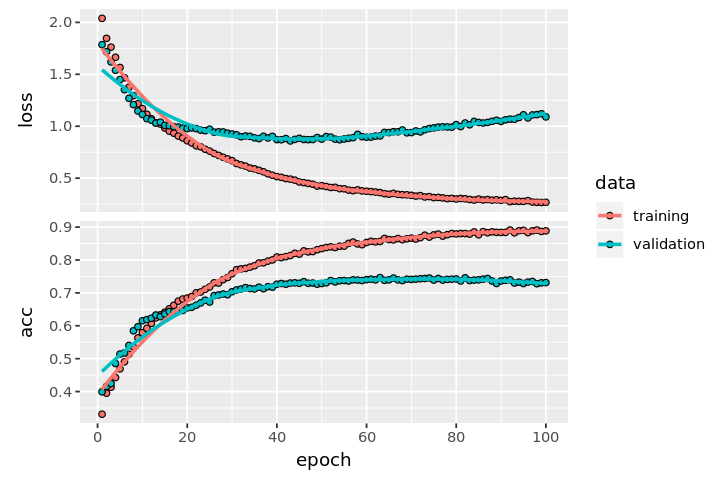

In [282]:
num_epochs <- 100

model <- keras_model_sequential() %>%
    layer_embedding(input_dim = 10000, output_dim = 2, input_length = maxlen) %>%
    layer_flatten() %>%
    layer_dense(units = 64, activation = "relu") %>%
#     layer_dense(units = 64, activation = "relu", input_shape = c(10000)) %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 64, activation = "relu") %>%
    layer_dropout(rate = 0.5) %>%
    layer_dense(units = 10, activation = "softmax")

model %>% compile(
    optimizer = optimizer_rmsprop(lr = 0.001),
    loss = "categorical_crossentropy",
    metrics = c("accuracy")
)

history <- model %>% fit(
    X_train, y_train,
    epochs = num_epochs,
    batch_size = 512,
    validation_data = list(X_val, y_val),
    callbacks = list(Progress$new(num_epochs, 10)),
    shuffle = TRUE
)

plot(history)